In [4]:
#type of person

import ijson
import re
import pandas as pd
import numpy as np
import os, sys, stat, time
import matplotlib.pyplot as plt

'''import sys
reload(sys)
sys.setdefaultencoding('utf-8')'''


fileType1= 'dataset/t1.json'
fileType2= 'dataset/t2.json'
fileType3= 'dataset/t3.json'
fileAll = 'all.json'
LINUX='/home/anil-mint-desktop/linux-stable'
#HOME='/home/anil-mint-desktop/patchstudy/test/datasets/ds'




dirList = ['arch','block','certs','crypto','Documentation',
           'drivers','firmware','fs','include','init',
           'ipc','kernel','lib','mm','net','samples',
           'scripts','security','sound','tools','usr','virt','staging']

def datasetReader(filename):
    with open(filename, 'r') as f:
        objects = ijson.items(f, 'item')
        rows = list(objects)
    return rows


            
import csv
def saveDict2File(aDict, filename):
    w = csv.writer(open(filename, "w"))
    for key, val in aDict.items():
        w.writerow([key, val])
def readFile2Dict(filename):
    dict = {}
    for key, val in csv.reader(open(filename)):
        dict[key] = val
    return dict

'''def retrieveAuthorSpeciality(uniqueAuthors ,commits):
    authorDict = dict()

    for a in uniqueAuthors:
        author1 = commits[commits.email == a]

        testDs = author1.paths.values

        l = list()
        
        for i in testDs:
            for j in i:
                l.append(j)


        
        paths =  pd.DataFrame.from_dict(l)

        pat = '|'.join(map(re.escape, dirList))
        paths = paths[paths.rootDir.str.contains(pat)]

        df = paths["rootDir"].value_counts().sort_index()
        x = df.index.values
        y = df.values
        authorDict[a] = [x.tolist(),y.tolist()]
        
    return authorDict'''
def retrieveAuthorSpeciality(uniqueAuthors ,commits):
    authorDict = dict()

    for a in uniqueAuthors:
        author1 = commits[commits.email == a]

        ''''sathyanarayanan.kuppuswamy@linux.intel.com': [[u'Documentation',
           u'arch',
           u'drivers'],
          [1, 46, 23]
          '''
        
        author1['folder'] = author1.paths.apply(findFolder)
        df = author1['folder'].str.split(',\s+').apply(lambda x: pd.Series(x).value_counts()).sum()
        
        #df = author1['folder'].value_counts().sort_index()
        x = df.index.values
        y = df.values
        authorDict[a] = [x.tolist(),y.tolist()]
        
    return authorDict

dirListNew = ['arch' 'block' 'certs' 'crypto' 'Documentation'
           'drivers' 'firmware' 'fs' 'include' 'init'
           'ipc' 'kernel' 'lib' 'mm' 'net' 'samples'
           'scripts' 'security' 'sound' 'tools' 'usr' 'virt']

def findFolder(x):

    folder = list()
    for i in x:
      
        path = i['path']
        rootDir = i['rootDir']

        patNew = '|'.join(map(re.escape, dirListNew))

            
        #regexp = re.compile(patNew)
        #if regexp.search(rootDir) is not None:
        if re.search('drivers', rootDir):
            if re.search('^drivers/staging', path):
                folder.append('staging')
            else:
                folder.append(rootDir)
        else:
            folder.append(rootDir)
        #else:
        #    folder.append('other')
    s = ', '.join(folder)
    return s

def perSpeciality(x,y):
    aDict = dict()
    total = sum(y)
    for i,j in zip(x,y):
        perc = (j* 100.0)/total
        aDict[i] = perc
    return aDict
def myfunction(text):
    try:
        text = unicode(text, 'utf-8')
    except TypeError:
        return text
    
    
def prepareYaxis(ds):
    commits = pd.DataFrame.from_dict(ds)
    
    uniqueAuthorsT1 = commits.email.unique()
    authorsDictT1 = retrieveAuthorSpeciality(uniqueAuthorsT1, commits)
    
    authorsDictT1 = ast.literal_eval(json.dumps(authorsDictT1))
    y1 = list()
    for k,v in authorsDictT1.iteritems():
        #print v
        [x,y] = (v)  
        print [x,y]
        percDict = percAuthorsDict[k]
        print percDict
        for i,j in zip(x,y):
            print i
            j = int (j)
            print j
            tmpPerc = percDict[i]
            print tmpPerc
            for z in range(j):
                y1.append(tmpPerc)
    return y1

def plotSpeciality(y1, y2,y3, outlier = True):

    y = [y1,y2,y3]
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        ax1.boxplot(y, 0, 'rs', 0, 2)
    else:
        ax1.boxplot(y, 0, '', 0, 2)

    
    ax1.grid(True)#, color='g' , linestyle ='-')

    ax1.set_yticklabels(['Automated Patches', 'Semi-Manual Patches', 'Manual Patches'])
    
    #if outlier == True:
    #    ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #    ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('% of Speciality',fontsize=18)
    plt.ylabel('Types',fontsize=18)
    plt.title("Speciality of all developers",fontsize=20)
    plt.tick_params(labelsize=16)

    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    plt.subplots_adjust(left=0.13,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(28.5,5.5, forward=True)
    
    #os.chdir(HOME)
    
    if outlier == True:
        plt.savefig("SpecialityOfAllDevelopers.png",dpi=100)
    else:
        plt.savefig("SpecialityOfAllDevelopersWithOutliers.png",dpi=100)

import pickle
import csv
def saveList(aFile,aList):
    with open(aFile, "wb") as fp:
        pickle.dump(aList,fp)
def loadList(aFile):
    with open(aFile, "rb") as fp:
        b = pickle.load(fp)
        
    return b

import json, ast

if __name__ == '__main__':
    #structureExtractor('stat2new')
    '''CWD = os.getcwd()
    if CWD != LINUX:
        os.chdir(LINUX)'''
    #print(CWD)
    #os.chdir(HOME)
    authorsDict = loadList('dataset/authorsDict3')
    if(len(authorsDict)<1):
        print 'bulamadi'
        dsAll = datasetReader(fileAll)

        commits = pd.DataFrame.from_dict(dsAll)
        uniqueAuthors = commits.author.unique()

        authorsDict = retrieveAuthorSpeciality(uniqueAuthors)

        os.chdir(HOME)
        saveDict2File(authorsDict,'RQ6-authorsDict')
     
    percAuthorsDict = dict()
    del authorsDict['']
    
    data = ast.literal_eval(json.dumps(authorsDict))

    
    for k,v in data.iteritems():
  
        
        [x,y] = v
        #print x
        #print y
        percen = perSpeciality(x,y)
        percAuthorsDict[k] = percen
        
    #saveDict2File(percAuthorsDict,'RQ6-percAuthorsDict')
    
    
    dsT1 = datasetReader(fileType1)
   
    dsT2 = datasetReader(fileType2)
  
    dsT3 = datasetReader(fileType3)


    y1 = prepareYaxis(dsT1)
    y2 = prepareYaxis(dsT2)
    y3 = prepareYaxis(dsT3)
            
            
    #plotSpeciality(y1,y2,y3, False)
    
    
    
    

/Users/anilkoyuncu/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[['arch'], [1]]
{'kernel': 1.2970969734403952, 'fs': 0.8647313156269302, 'lib': 0.06176652254478073, 'mm': 0.06176652254478073, 'drivers': 2.7794935145151327, 'Documentation': 0.5558987029030266, 'Makefile': 0.30883261272390367, 'init': 0.06176652254478073, 'scripts': 0.6176652254478073, 'include': 1.2353304508956147, 'arch': 92.15565163681285}
arch
1
92.1556516368
[['drivers'], [3]]
{'drivers': 95.19663764635244, 'include': 1.0507355148604023, 'staging': 0.03002101471029721, 'net': 3.7226058240768536}
drivers
3
95.1966376464
[['staging'], [17]]
{'drivers': 1.2048192771084338, 'staging': 98.79518072289157}
staging
17
98.7951807229
[['drivers'], [1]]
{'sound': 10.354101299865532, 'kernel': 0.04482294935006723, 'fs': 0.17929179740026893, 'staging': 2.5997310623038996, 'drivers': 80.54683998207082, 'Documentation': 0.8964589870013447, 'crypto': 0.1344688480502017, 'MAINTAINERS': 0.35858359480053786, 'scripts': 0.22411474675033619, 'net': 0.1344688480502017, 'include': 0.6275212909009413, 

KeyboardInterrupt: 

In [5]:
commitment = loadList('dataset/experienceAll')

semiManual = pd.DataFrame.from_dict(dsT2)
    
uniqueAuthorsSM = semiManual.email.unique()

auto = pd.DataFrame.from_dict(dsT1)
uniqueAuthorsA = auto.email.unique()

#manual = pd.DataFrame.from_dict(dsT3)
#uniqueAuthorsM = manual.email.unique()

def specializedIn(sFolder, threshold=50):
    specializedInFolder = dict()
    for k,v in percAuthorsDict.items():
        for folder, per in v.items():
            if folder == sFolder and per >= threshold:

                specializedInFolder[k] = per
    return specializedInFolder
    

def haveToolCommits(specialized):
    dmDict = dict()
    for a in uniqueAuthorsSM:
        try:
            dmDict[a] = specialized[a.decode('utf-8')]
        except:
            continue
            #print a, 'FAILS '
    for a in uniqueAuthorsA:
        try:
            if not dmDict.has_key(a):
                dmDict[a] = specialized[a.decode('utf-8')]
        except:
            continue
            #print a, 'FAILS '
    return dmDict
    

import pandas as pd


def prepareSpearman(aDict):
    columns = [ 'email', 'specilazation', 'commitment' ]    
    aDf = pd.DataFrame(columns=columns) 

    i =0
    for k,v in aDict.items():
        try:
            aDf.loc[i] = [k, v, commitment[k]]
            i = i+1
        except:
            continue
            #print k
        def getNumberOfCommits(x):
    
            cAuto = auto[auto.email == x]
            cSemi = semiManual[semiManual.email == x]
            return len(cAuto) + len(cSemi)

    aDf['commits'] = aDf.email.apply(getNumberOfCommits)
    return aDf

from scipy import stats 
def calculateSpearman(aDf):
    print 'Sample size:' ,len(aDf)
    res= stats.stats.spearmanr(aDf.commits.values,aDf.commitment.values)
    print res
    
    
def mainSpearman(where):
    #where = 'drivers'
    print where
    specializedInStaging = specializedIn(where,0)
    print '# distinct author worked in:' , len(specializedInStaging)
    specializedInStaging = specializedIn(where)
    print '# distinct author specialised in (with exp > 50):',len(specializedInStaging)
    a = haveToolCommits(specializedInStaging)
    print '#author specialised in  with a tool commits (semi-manual or automated)'
    print len(a)
    if len(a)!= 0:
        b = prepareSpearman(a)
        calculateSpearman(b)

In [216]:
mainSpearman('drivers')

drivers
# distinct author worked in: 12196
# distinct author specialised in (with exp > 50): 9105
#author specialised in  with a tool commits (semi-manual or automated)
144
Sample size: 143
SpearmanrResult(correlation=0.11092928405680283, pvalue=0.18718466615303495)


In [141]:
count = 0
for kernelDev,v in specializedInKernel.items():
    if kernelDev.decode('utf-8') in uniqueAuthorsA:
        count= count+1
    elif kernelDev.decode('utf-8') in uniqueAuthorsSM:
        count= count+1

In [125]:
kmDict = dict()
for a in uniqueAuthorsSM:
    try:
        kmDict[a] = specializedInKernel[a.decode('utf-8')]
    except:
        print a, 'FAILS '
for a in uniqueAuthorsA:
    try:
        kmDict[a] = specializedInKernel[a.decode('utf-8')]
    except:
        print a, 'FAILS '

bankarsandhya512@gmail.com FAILS 
hantai1248@hotmail.com FAILS 
kvalo@qca.qualcomm.com FAILS 
newell.roger@gmail.com FAILS 
bmarsh94@gmail.com FAILS 
tony.cho@atmel.com FAILS 
chaehyun.lim@gmail.com FAILS 
shaun.ren@linux.com FAILS 
eraretuya@gmail.com FAILS 
bhumirks@gmail.com FAILS 
ksenija.stanojevic@gmail.com FAILS 
ira.weiny@intel.com FAILS 
jmarrero@gmail.com FAILS 
amsfield22@gmail.com FAILS 
christian.gromm@microchip.com FAILS 
insafonov@gmail.com FAILS 
aybuke.147@gmail.com FAILS 
chasemetzger15@gmail.com FAILS 
arjunkrishnababu96@gmail.com FAILS 
geliangtang@163.com FAILS 
cristian97.ardelean@gmail.com FAILS 
luis@debethencourt.com FAILS 
lj@buggybrain.net FAILS 
perry.hooker@gmail.com FAILS 
ana.calinov@gmail.com FAILS 
andrzejtp2010@gmail.com FAILS 
jarr@kerneldev.net FAILS 
andreasabu@gmail.com FAILS 
anafnedelcu@gmail.com FAILS 
cosmintom@gmail.com FAILS 
benjamin.romer@unisys.com FAILS 
cristina.opriceana@gmail.com FAILS 
sven.dziadek@gmx.de FAILS 
hamohammed.sa@gmail.co

In [143]:
smDict = dict()
for a in uniqueAuthorsSM:
    try:
        smDict[a] = specializedInStaging[a]
    except:
        print a, 'FAILS '
        
for a in uniqueAuthorsA:
    try:
        smDict[a] = specializedInStaging[a]
    except:
        print a, 'FAILS '

kvalo@qca.qualcomm.com FAILS 
ira.weiny@intel.com FAILS 
chasemetzger15@gmail.com FAILS 
geliangtang@163.com FAILS 
cristian97.ardelean@gmail.com FAILS 
luis@debethencourt.com FAILS 
ana.calinov@gmail.com FAILS 
anafnedelcu@gmail.com FAILS 
cosmintom@gmail.com FAILS 
md.jamalmohiuddin@gmail.com FAILS 
marcel@holtmann.org FAILS 
levex@linux.com FAILS 
ravi23ganiga@gmail.com FAILS 
carolyn.wyborny@intel.com FAILS 
standby24x7@gmail.com FAILS 
damien.lespiau@intel.com FAILS 
ahiliation@yahoo.co.in FAILS 
proski@gnu.org FAILS 
roberto.sassu@polito.it FAILS 
moinejf@free.fr FAILS 
farid.hammane@gmail.com FAILS 
luisbg@dharma.ireland.sun.com FAILS 
mkrufky@linuxtv.org FAILS 
bzolnier@gmail.com FAILS 
marcin.slusarz@gmail.com FAILS 
sfrench@us.ibm.com FAILS 
linus.walleij@linaro.org FAILS 
maninder1.s@samsung.com FAILS 
colin.king@canonical.com FAILS 
vbridgers2013@gmail.com FAILS 
rickard_strandqvist@spectrumdigital.se FAILS 
toralf.foerster@gmx.de FAILS 
dborkman@redhat.com FAILS 
weil@mail

In [92]:
import pandas as pd
columns = [ 'email', 'specilazation', 'commitment' ]    
stagingDf = pd.DataFrame(columns=columns) 

i =0
for k,v in smDict.items():
    try:
        stagingDf.loc[i] = [k, v, commitment[k]]
        i = i+1
    except:
        print k

In [101]:
import pandas as pd
columns = [ 'email', 'specilazation', 'commitment' ]    
driversDf = pd.DataFrame(columns=columns) 

i =0
for k,v in dmDict.items():
    try:
        driversDf.loc[i] = [k, v, commitment[k]]
        i = i+1
    except:
        print k

mchehab@kernel.org


In [45]:
import pandas as pd
columns = [ 'email', 'specilazation', 'commitment' ]    
kernelDf = pd.DataFrame(columns=columns) 

i =0
for k,v in kmDict.items():
    try:
        kernelDf.loc[i] = [k, v, commitment[k]]
        i = i+1
    except:
        print k

In [105]:

from scipy import stats 
print 'lenght' ,len(driversDf)
stats.stats.spearmanr(driversDf.commits.values,driversDf.commitment.values)

lenght 141


SpearmanrResult(correlation=0.12541533074307964, pvalue=0.13838677291993146)

In [94]:
stagingDf
from scipy import stats 
print 'lenght' ,len(stagingDf)
stats.stats.spearmanr(stagingDf.commits.values,stagingDf.commitment.values)

lenght 138


SpearmanrResult(correlation=0.42822450479757868, pvalue=1.611213091255484e-07)

In [95]:
stagingDf
from scipy import stats 
print 'lenght' ,len(kernelDf)
stats.stats.spearmanr(kernelDf.commits.values,kernelDf.commitment.values)

lenght 13


SpearmanrResult(correlation=0.11062441971717746, pvalue=0.7190119425692274)

In [56]:
def getNumberOfCommits(x):
    
    cAuto = auto[auto.email == x]
    cSemi = semiManual[semiManual.email == x]
    return len(cAuto) + len(cSemi)

kernelDf['commits'] = kernelDf.email.apply(getNumberOfCommits)

In [104]:
kernelDf['commits'] = kernelDf.email.apply(getNumberOfCommits)
stagingDf['commits'] = stagingDf.email.apply(getNumberOfCommits)
driversDf['commits'] = driversDf.email.apply(getNumberOfCommits)

In [37]:
commitNo = list()
for a in smDict.keys():
    sm = semiManual[semiManual.email == a]
    commitNo.append(len(sm))

In [12]:
y = [y1, y2, y3]

In [15]:
saveList('developerSpeciality', y)

In [7]:
#LOAD FROM HERE

a = loadList('dataset/developerSpeciality')
[y1, y2, y3] = a

In [19]:
c1 = pd.DataFrame(y1,columns=['Speciality'])
c1['type'] = 'H'
c2 = pd.DataFrame(y2,columns=['Speciality'])
c2['type'] = 'DLH'
c3 = pd.DataFrame(y3,columns=['Speciality'])
c3['type'] = 'HMG'


frames = [c1, c2, c3]

result = pd.concat(frames)

result.to_csv('issta_speciality.csv')

/Users/anilkoyuncu/patchstudy2/patchstudy/released


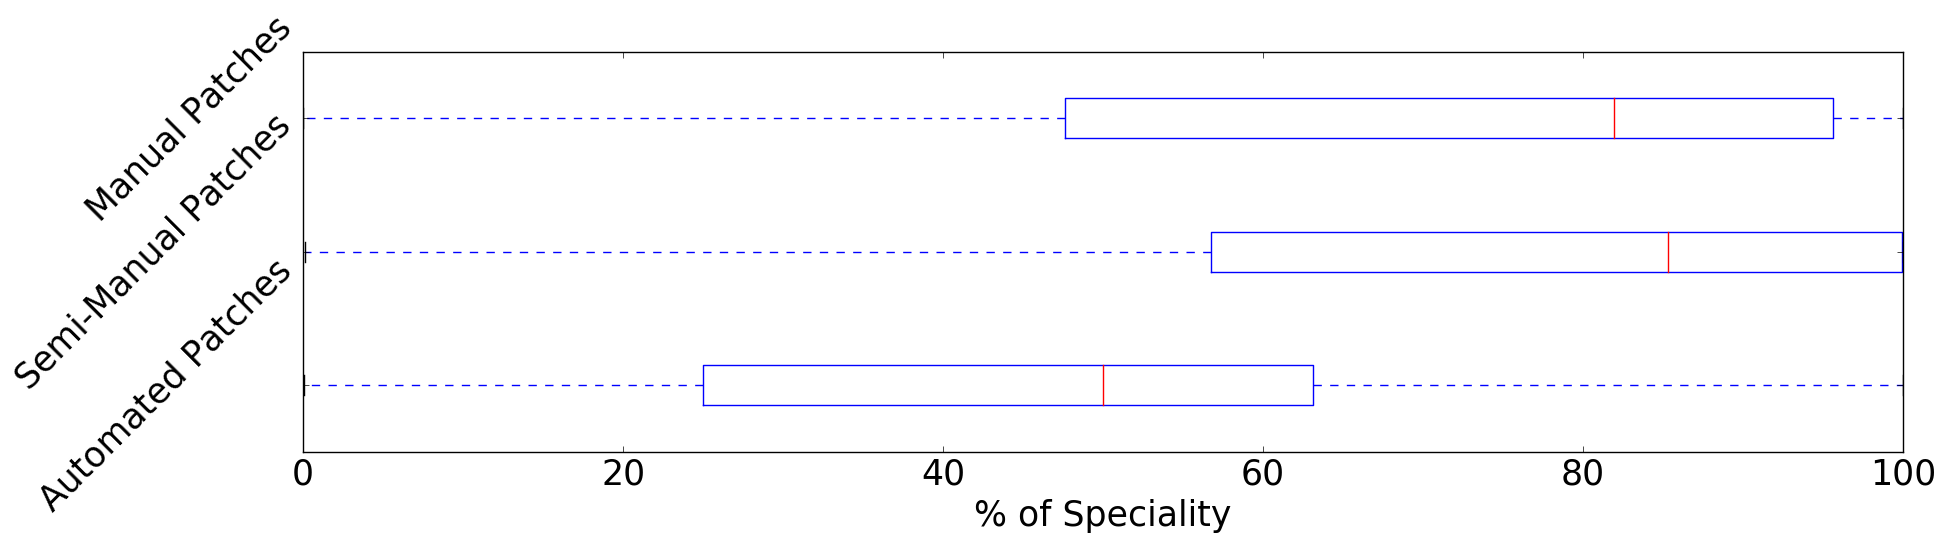

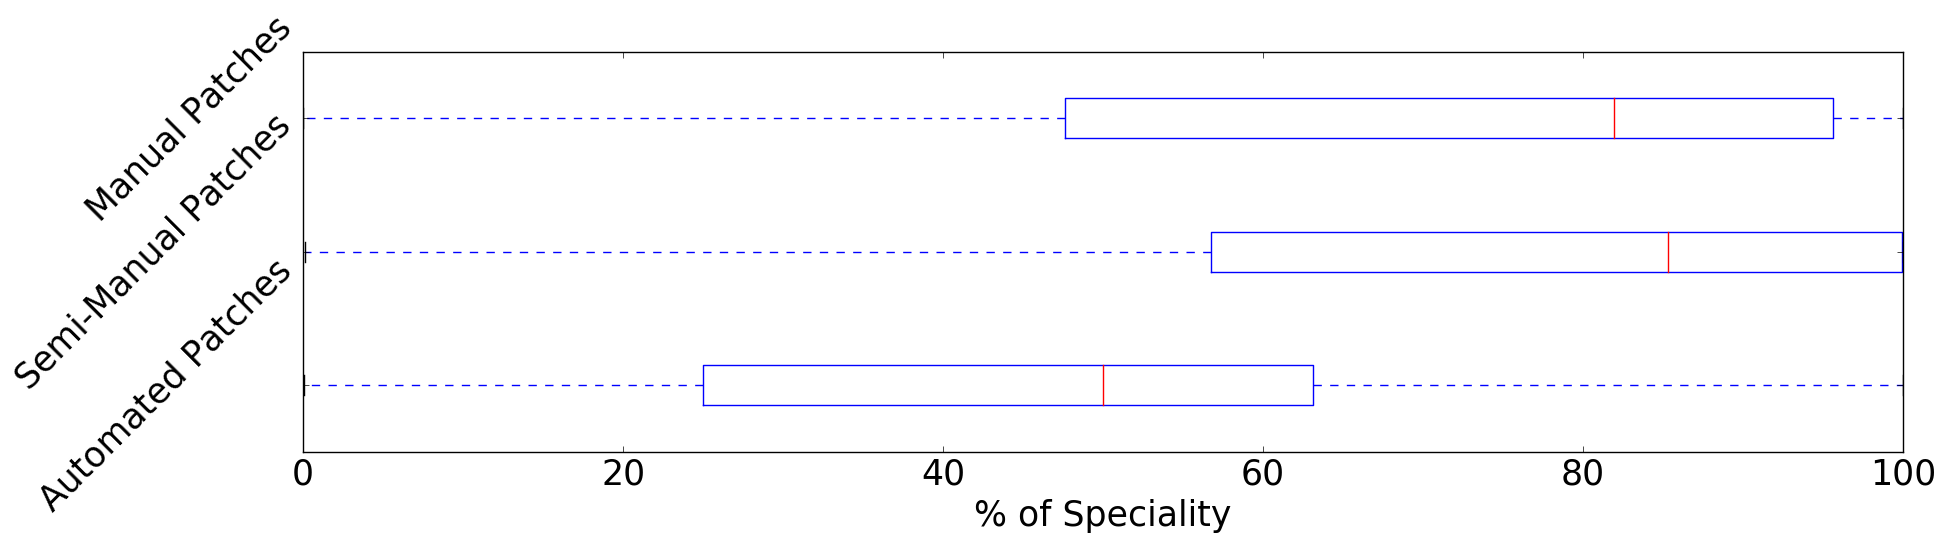

In [9]:
def plotSpeciality2(y1, y2,y3, outlier = True):

    y = [y1,y2,y3]
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #print y
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        ax1.boxplot(y, 0, 'rs', 0, 2)
    else:
        ax1.boxplot(y, 0, '', 0, 2)

    
    #ax1.grid(True)#, color='g' , linestyle ='-')

    varLabels = ['Automated Patches', 'Semi-Manual Patches', 'Manual Patches']
    
    ax1.set_yticklabels(varLabels, rotation=45)
    
    #if outlier == True:
    #    ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #    ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('% of Speciality',fontsize=25)
    #plt.ylabel('Types',fontsize=20)
    #plt.title("Speciality of all developers",fontsize=20)
    plt.tick_params(labelsize=25)

    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    plt.subplots_adjust(left=0.18,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(20,5, forward=True)
    #ax1.set_xscale('log')
    #os.chdir(HOME)
    
    if outlier == True:
        plt.savefig("plots/SpecialityOfAllDevelopers.pdf",dpi=100)
    else:
        plt.savefig("plots/SpecialityOfAllDevelopersWithOutliers.pdf",dpi=100)
CWD = os.getcwd()
print CWD
plotSpeciality2(y1,y2,y3, False)